# Class Challenge: Image Classification of COVID-19 X-rays
# Task 2 [Total points: 30]

## Setup

* This assignment involves the following packages: 'matplotlib', 'numpy', and 'sklearn'. 

* If you are using conda, use the following commands to install the above packages:<br>
```shell
conda install matplotlib
conda install numpy
conda install -c anaconda scikit-learn
```

* If you are using pip, use use the following commands to install the above packages: <br> 
```shell
pip install matplotlib
pip install numpy
pip install sklearn
```

## Data

Please download the data using the following link: [COVID-19](https://drive.google.com/file/d/1Y88tgqpQ1Pjko_7rntcPowOJs_QNOrJ-/view). 

* After downloading 'Covid_Data_GradientCrescent.zip', unzip the file and you should see the following data structure:


|--all<br>
|--------train<br>
|--------test<br>
|--two<br>
|--------train<br>
|--------test<br>


* Put the 'all' folder, the 'two' folder and this python notebook in the **same directory** so that the following code can correctly locate the data.  



## [20 points] Multi-class Classification

In [ ]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.4.1'

#### Load Image Data

In [ ]:
DATA_LIST = os.listdir('all/train')
DATASET_PATH  = 'all/train'
TEST_DIR =  'all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 8  
NUM_EPOCHS    = 100
LEARNING_RATE = 0.0005 

#### Generate Training and Validation Batches

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


#### [10 points] Build Model
Hint: Starting from a pre-trained model typically helps performance on a new task, e.g. starting with weights obtained by training on ImageNet. 

In [ ]:
vgg_model = tf.keras.applications.VGG16(
    weights = "imagenet",
    input_shape = (224, 224, 3),
    include_top = False
)

vgg_model.trainable = False

model6 = tf.keras.models.Sequential()
model6.add(vgg_model)
model6.add(tf.keras.layers.AveragePooling2D(pool_size=(3,3)))
model6.add(tf.keras.layers.Flatten())
model6.add(tf.keras.layers.Dropout(rate = 0.5))
model6.add(tf.keras.layers.Dense(256, name = "dense_feature"))
model6.add(tf.keras.layers.Dense(4, activation='softmax'))
model6.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
average_pooling2d_1 (Average (None, 2, 2, 512)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_feature (Dense)        (None, 256)               524544    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1028      
Total params: 15,240,260
Trainable params: 525,572
Non-trainable params: 14,714,688
____________________________________

#### [5 points] Train Model

In [ ]:
model6.compile(optimizer='adam',
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=['acc'])

#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size


history = model6.fit(
    train_batches, 
    epochs=NUM_EPOCHS, steps_per_epoch=STEP_SIZE_TRAIN, 
    batch_size=BATCH_SIZE, 
    validation_data = valid_batches, validation_steps=STEP_SIZE_VALID
)

27
7


D:\downloads\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
D:\downloads\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
27/27 [==============================] - 25s 893ms/step - loss: 0.8419 - acc: 0.6275 - val_loss: 0.6343 - val_acc: 0.7292
Epoch 2/100
27/27 [==============================] - 24s 886ms/step - loss: 0.8315 - acc: 0.5901 - val_loss: 0.7033 - val_acc: 0.6667
Epoch 3/100
27/27 [==============================] - 24s 884ms/step - loss: 0.7201 - acc: 0.6891 - val_loss: 0.6162 - val_acc: 0.7083
Epoch 4/100
27/27 [==============================] - 24s 904ms/step - loss: 0.7294 - acc: 0.6903 - val_loss: 0.7205 - val_acc: 0.6875
Epoch 5/100
27/27 [==============================] - 24s 883ms/step - loss: 0.6578 - acc: 0.6521 - val_loss: 0.6881 - val_acc: 0.6458
Epoch 6/100
27/27 [==============================] - 24s 884ms/step - loss: 0.8368 - acc: 0.6195 - val_loss: 0.6399 - val_acc: 0.6667
Epoch 7/100
27/27 [==============================] - 24s 885ms/step - loss: 0.7708 - acc: 0.6694 - val_loss: 0.7695 - val_acc: 0.6250
Epoch 8/100
27/27 [==============================] - 24s 896ms

#### [5 points] Plot Accuracy and Loss During Training

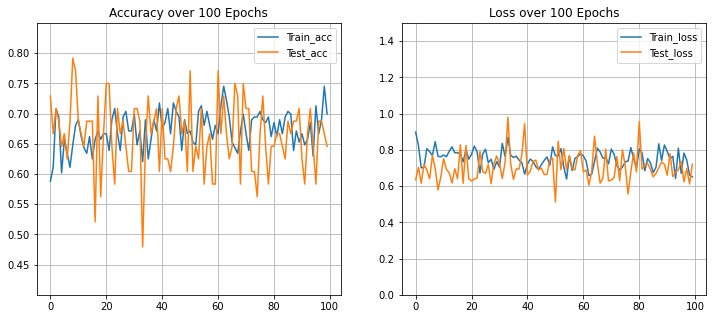

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 5]
fig, (ax1, ax2) = plt.subplots(1, 2)


ax1.plot(history.history['acc'], label = 'Train_acc')
ax1.plot(history.history['val_acc'], label = 'Test_acc')
ax1.set_title("Accuracy over 100 Epochs")
ax1.legend(['Train_acc','Test_acc'])
ax1.grid()
ax1.set_yticks([0.45, 0.5,0.55,0.6,0.65,0.7,0.75,0.8])
ax1.set_ylim([0.4,0.85])

ax2.plot(history.history['loss'], label = 'Train_loss')
ax2.plot(history.history['val_loss'], label = 'Test_loss')
ax2.set_title("Loss over 100 Epochs")
ax2.legend(['Train_loss','Test_loss'])
ax2.set_ylim([0,1.5])
ax2.grid()


plt.show()

#### Testing Model

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))

Found 36 images belonging to 4 classes.
36


D:\downloads\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


36/36 [==============================] - 4s 94ms/step - loss: 0.8552 - acc: 0.5833
Test loss: 0.8551800847053528
Test accuracy: 0.5833333134651184


In [ ]:
x6 = model6.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x6[0])
print('Test accuracy:',x6[1])

36/36 [==============================] - 3s 95ms/step - loss: 0.6917 - acc: 0.7222
Test loss: 0.6917243599891663
Test accuracy: 0.7222222089767456


## [10 points] TSNE Plot
t-Distributed Stochastic Neighbor Embedding (t-SNE) is a widely used technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. After training is complete, extract features from a specific deep layer of your choice, use t-SNE to reduce the dimensionality of your extracted features to 2 dimensions and plot the resulting 2D features.

Found 270 images belonging to 4 classes.


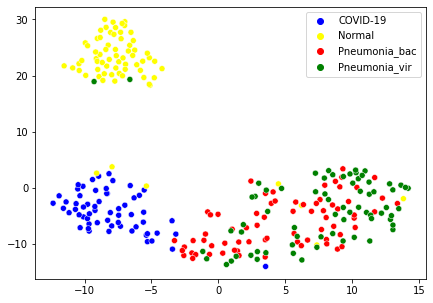

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

intermediate_layer_model = tf.keras.models.Model(inputs=model6.input,
                                        outputs=model6.get_layer('dense_feature').output)

tsne_eval_generator = test_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=False,seed=42,class_mode="categorical")


plt.rcParams['figure.figsize'] = [7, 5]

intermediate_output = intermediate_layer_model.predict(tsne_eval_generator)
tsne = TSNE(n_components=2)
results = tsne.fit_transform(intermediate_output)
h = tsne_eval_generator.labels
sns.scatterplot(x = results[:,0], y = results[:,1], legend = 'full', hue= h, palette=["blue", "yellow","red","green"])

L=plt.legend()
L.get_texts()[0].set_text('COVID-19')
L.get_texts()[1].set_text('Normal')
L.get_texts()[2].set_text('Pneumonia_bac')
L.get_texts()[3].set_text('Pneumonia_vir')

<!-- ## Task 2: COVID-19 vs Normal vs Tertiary Pneumonia (Bacterial and Viral) -->

<!-- #### Renew Training Batch and Validation Batch -->

<!-- #### Renew Model -->